In [26]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")


In [22]:
path = './eval_dataset.csv'
df = pd.read_csv(path)

df.head()

,Unnamed: 0,SessionID,ItemID,Timestamp,event_type_idx,event_search,domain_count,item_id_count,event_type_click,domain_id,...,average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,ndcg_ml
0,0,0,1748830,2019-10-20 23:29:11.646,2,[18752],0,1868.0,1,MLB-SMARTWATCHES,...,0.500,0.0,0.5,0.500,1.0,1.000000,1.000000,1.000000,1.000000,0.738813
1,1,2,1909110,2019-10-01 17:22:20.697,2,[18752],0,76.0,1,MLB-CELLPHONE_ACCESSORIES,...,0.000,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,3,1197370,2019-10-12 14:03:21.871,2,[18752],0,100.0,1,MLB-CARD_PAYMENT_TERMINALS,...,0.000,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.027708
3,3,4,2049207,2019-09-30 18:53:33.520,2,[18752],0,181.0,1,MLB-SMARTWATCHES,...,0.125,0.0,0.0,0.125,0.0,0.333333,0.333333,0.333333,0.333333,0.340049
4,4,5,1046119,2019-10-18 14:13:00.186,2,[18752],0,44.0,1,MLB-CELLPHONES_AND_TELEPHONY,...,0.000,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 81 columns):
Unnamed: 0                              863 non-null int64
SessionID                               863 non-null int64
ItemID                                  863 non-null int64
Timestamp                               863 non-null object
event_type_idx                          863 non-null int64
event_search                            863 non-null object
domain_count                            863 non-null int64
item_id_count                           863 non-null float64
event_type_click                        863 non-null int64
domain_id                               863 non-null object
condition                               863 non-null object
category_id                             863 non-null object
item_id                                 863 non-null int64
price                                   863 non-null float64
product_id                              863 non-null int64
t

In [43]:
df.columns

Index(['Unnamed: 0', 'SessionID', 'ItemID', 'Timestamp', 'event_type_idx',
       'event_search', 'domain_count', 'item_id_count', 'event_type_click',
       'domain_id', 'condition', 'category_id', 'item_id', 'price',
       'product_id', 'title', 'category_idx', 'condition_idx', 'domain_idx',
       'last_ItemID', 'last_category_idx', 'last_product_id',
       'last_ItemID_title', 'last_event_search', 'last_event_type_idx',
       'last_title_search', 'step', 'previous_t', 'diff_Timestamp',
       'int_Timestamp', 'cum_Timestamp', 'price_norm', 'last_price_norm',
       'diff_price_norm', 'last_domain_idx', 'min_last_price_norm',
       'max_last_price_norm', 'mean_last_price_norm', 'sum_last_price_norm',
       'visit', 'step_history', 'timestamp_history', 'cum_timestamp_history',
       'event_type_idx_history', 'category_idx_history',
       'condition_idx_history', 'domain_idx_history', 'product_id_history',
       'price_history', 'ItemID_history', 'title_search_history',
      

In [65]:
features = [
       'last_ItemID', 'last_category_idx', 'last_product_id',
       'last_event_type_idx', 'step', 'diff_Timestamp',
       'int_Timestamp', 'cum_Timestamp', 'last_price_norm',
       'diff_price_norm', 'last_domain_idx', 'min_last_price_norm',
       'max_last_price_norm', 'mean_last_price_norm', 'sum_last_price_norm',
       'mode_category_idx_history', 'mode_condition_idx_history',
       'mode_domain_idx_history', 'mode_product_id_history',
       'mode_event_type_idx_history', 'count_mode_category_idx_history',
       'count_mode_condition_idx_history', 'count_mode_domain_idx_history',
       'count_mode_product_id_history', 'count_mode_event_type_idx_history',
       'count_event_type_idx_history__search',
       'count_event_type_idx_history__view', 'count_condition_idx__new',
       'count_condition_idx__used', 'perc_newlest_search', 'perc_event_view',
       'ndcg_ml']

df_train = df[features]
df_train['class'] = df_train.ndcg_ml < 0.1
df_train

/home/marlesson/anaconda3/envs/triplet-session/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,last_ItemID,last_category_idx,last_product_id,last_event_type_idx,step,diff_Timestamp,int_Timestamp,cum_Timestamp,last_price_norm,diff_price_norm,...,count_mode_product_id_history,count_mode_event_type_idx_history,count_event_type_idx_history__search,count_event_type_idx_history__view,count_condition_idx__new,count_condition_idx__used,perc_newlest_search,perc_event_view,ndcg_ml,class
0,1615991,480,0,4,20,0,421769,1916,-0.0086,0.0,...,17,17,1,17,17,0,1.00,0.94,0.738813,False
1,248595,733,0,4,3,0,394042,0,-0.0086,0.0,...,1,1,0,1,1,0,1.00,1.00,0.000000,True
2,937557,589,0,4,14,0,409683,5374,-0.0086,0.0,...,7,7,5,7,2,5,0.29,0.58,0.027708,True
3,86082,6125,14593631,3,70,0,392693,7553,-0.0086,0.0,...,17,10,10,10,20,0,1.00,0.50,0.340049,False
4,1135701,1141,0,4,9,0,418333,2691,-0.0085,0.0,...,4,4,3,4,4,0,1.00,0.57,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,-1,-1,-1,3,7,0,410314,1976,0.0000,0.0,...,0,5,5,0,0,0,0.00,0.00,0.000000,True
859,927467,94,0,4,81,0,414450,6194,-0.0086,0.0,...,18,20,0,20,16,3,0.84,1.00,0.000000,True
860,977841,126,0,4,48,0,399995,2949,-0.0086,0.0,...,12,11,11,9,15,5,0.75,0.45,0.000000,True
861,617673,3690,0,3,74,0,402428,4224,-0.0086,0.0,...,20,17,17,3,20,0,1.00,0.15,0.266463,False


In [66]:
df_eval = df_train[['step', 'perc_event_view', "perc_newlest_search",
              'count_mode_event_type_idx_history','count_event_type_idx_history__search', 'class',
              'ndcg_ml']]
df_eval['zero'] = df_eval['ndcg_ml'] == 0
df_eval

/home/marlesson/anaconda3/envs/triplet-session/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,step,perc_event_view,perc_newlest_search,count_mode_event_type_idx_history,count_event_type_idx_history__search,class,ndcg_ml,zero
0,20,0.94,1.00,17,1,False,0.738813,False
1,3,1.00,1.00,1,0,True,0.000000,True
2,14,0.58,0.29,7,5,True,0.027708,False
3,70,0.50,1.00,10,10,False,0.340049,False
4,9,0.57,1.00,4,3,True,0.000000,True
...,...,...,...,...,...,...,...,...
858,7,0.00,0.00,5,5,True,0.000000,True
859,81,1.00,0.84,20,0,True,0.000000,True
860,48,0.45,0.75,11,11,True,0.000000,True
861,74,0.15,1.00,17,17,False,0.266463,False


In [67]:
df_eval['ndcg_ml'].mean()

0.1681096490211199

/home/marlesson/anaconda3/envs/triplet-session/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


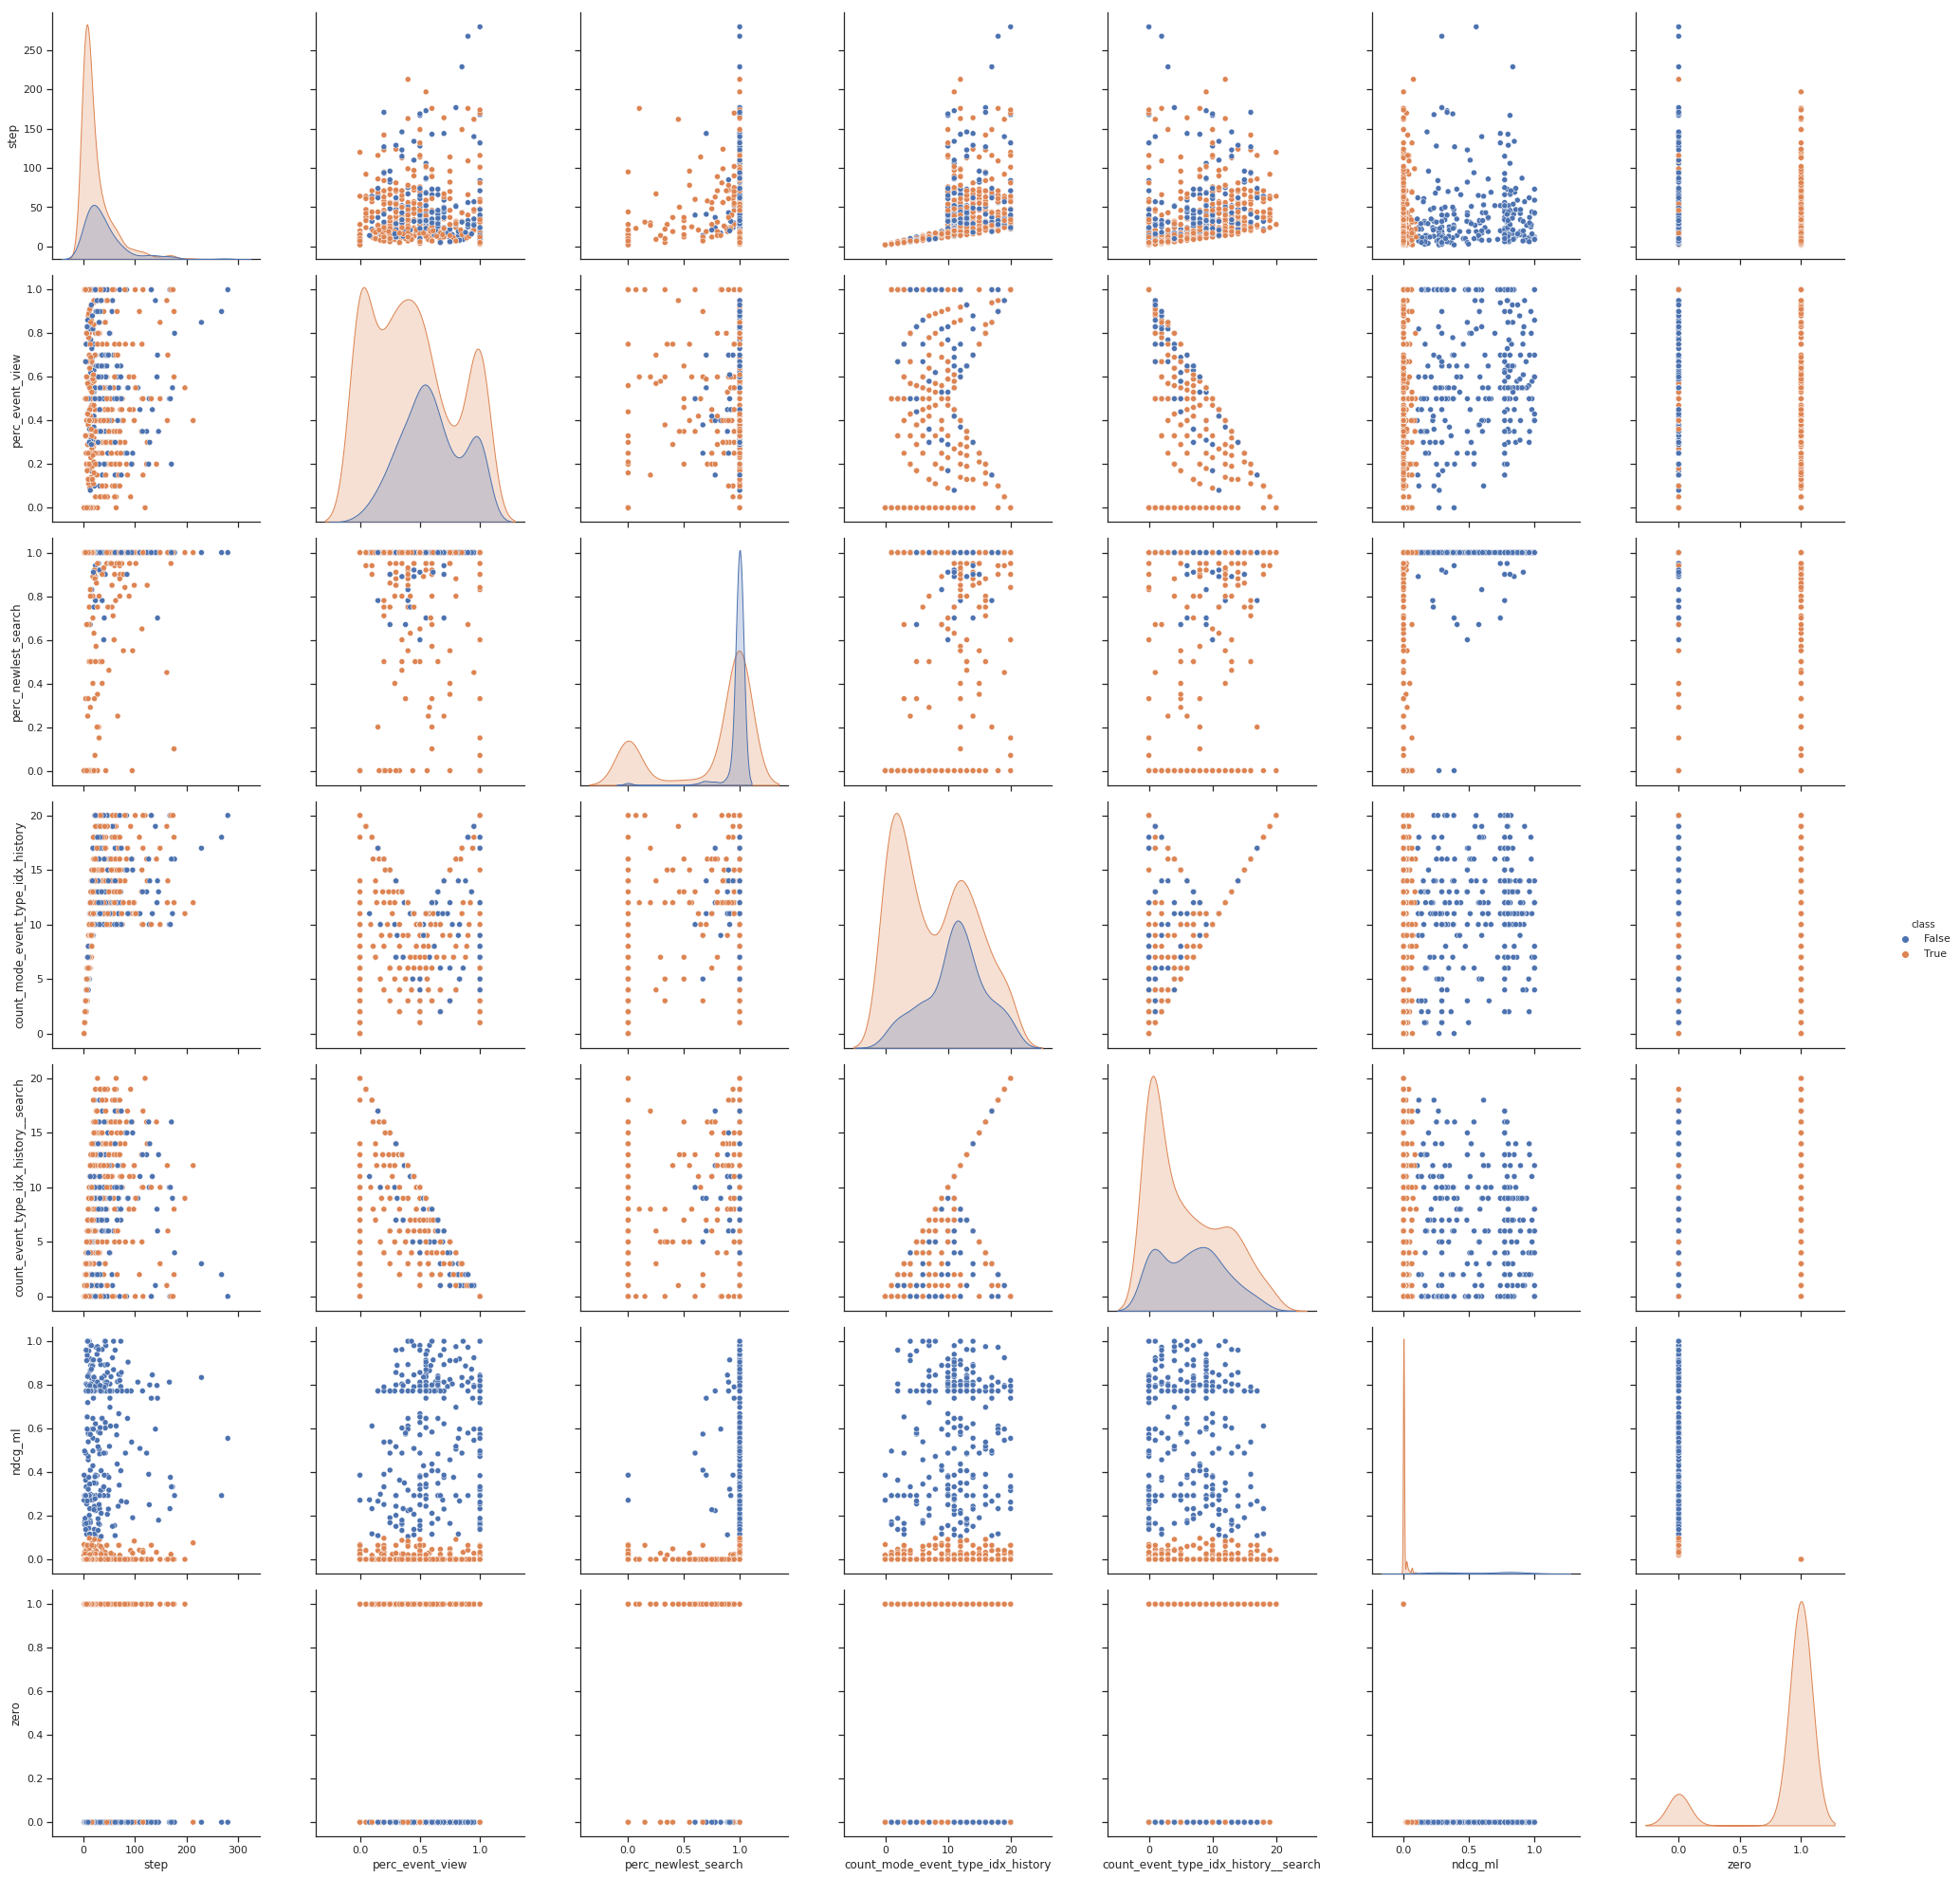

In [68]:
sns.pairplot(df_eval,  hue="class", height=4)

In [19]:
df['ItemID_history'].apply(lambda h: h.replace(" ", "_").split('_'))

0      [[1615991, 1615991, 1615991, 1615991, 1615991,...
1      [[248595, , , , , -1, , , , , -1, , , , , -1, ...
2      [[, 937557, 1230082, , 505541, , 505541, , 505...
3      [[, , 86082, , , 86082, 1587422, 1313192, 1313...
4      [[1135701, 1135701, , 794504, 2029385, , , , ,...
                             ...                        
858    [[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...
859    [[, 927467, 1690804, 1106024, 1690804, , 75698...
860    [[, 977841, , 977841, , 977841, , 977841, , 19...
861    [[, 617673, 1980693, , 839113, 2024029, 202402...
862    [[, 222909, , 503896, , 222909, 1341110, , 222...
Name: ItemID_history, Length: 863, dtype: object

In [20]:
df['ItemID_history'].iloc[0]

'[1615991 1615991 1615991 1615991 1615991 1615991 1615991 1615991 1615991\n 1615991 1615991 1615991 1615991 1615991 1615991 1615991 1786148      -1\n      -1      -1]'

In [ ]:
'[1615991 1615991 1615991 1615991 1615991 1615991 1615991 1615991 1615991\n 1615991 1615991 1615991 1615991 1615991 1615991 1615991 1786148      -1\n      -1      -1]'
